In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip '/content/drive/MyDrive/eye detection.zip'

Archive:  /content/drive/MyDrive/eye detection.zip
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_(742).jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_(747).jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_(749).jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_100.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_101.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_102.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_103.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_104.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_105.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_106.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_107.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_108.jpg  
  inflating: Data_P

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
import os
from glob import glob
import tensorflow_hub as hub
from IPython.display import clear_output as cls
from keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.express as px
import matplotlib.pyplot as plt

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory (
directory = '/content/Data_Processed_Paper',
labels = 'inferred',
label_mode = 'int',
batch_size = 32,
image_size =(256,256)
)

Found 411 files belonging to 1 classes.


In [6]:
# generators
validation_ds = keras.utils.image_dataset_from_directory (
    directory = '/content/Data_Raw_6class_All',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)

Found 411 files belonging to 1 classes.


In [7]:
#normalize
def process(image,label):
 image = tf.cast(image/255.,tf.float32)
 return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding= 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding= 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8181 - loss: 0.2546 - val_accuracy: 0.0706 - val_loss: 20.7942
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 70.9406
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 107.9241
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 132.8307
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 924ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 149.9927
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 842ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 161.6453
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 821ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 168.8885
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 945ms/s

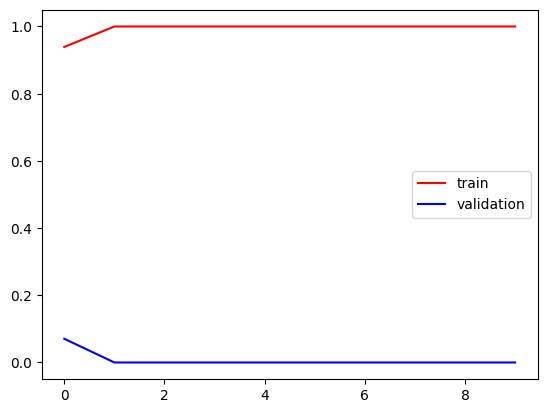

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label= 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label= 'validation')
plt.legend()
plt.show()

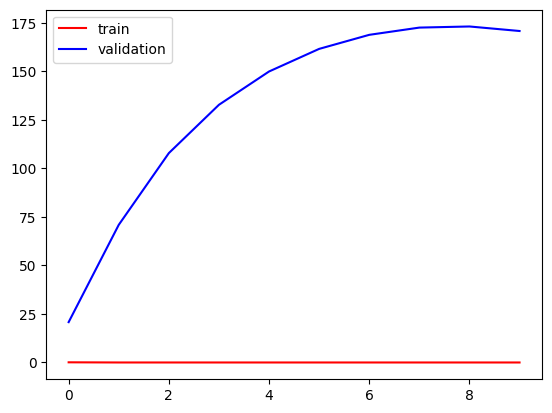

In [13]:
plt.plot(history.history['loss'],color='red',label= 'train')
plt.plot(history.history['val_loss'],color = 'blue', label= 'validation')
plt.legend()
plt.show()

In [14]:
import cv2

In [15]:
test_img=cv2.imread('/content/Data_Raw_6class_All/Data_Raw_6class_All/active/114.jpg')

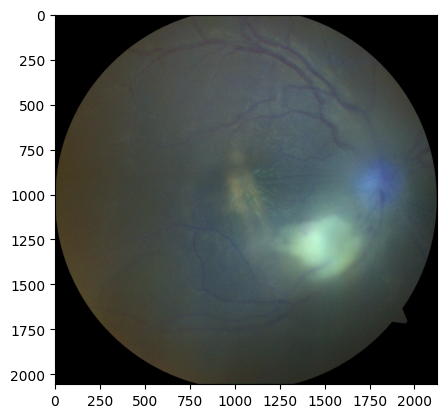

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(2056, 2124, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape(1,256,256,3)

In [20]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)